In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
# Inicializar el modelo
classifier = Sequential()

# Paso 1 - Convolución
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Paso 2 - MaxPooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa de convolución para mejorar la precisión
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Paso 3 - Flattening
classifier.add(Flatten())

# Paso 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=2, activation='softmax')) # Cambiar a la cantidad de clases que tengas

# Compilar la red neuronal convolucional
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Preprocesamiento de las imágenes
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/training_set', target_size=(64, 64), batch_size=32, class_mode='categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test_set', target_size=(64, 64), batch_size=32, class_mode='categorical')

Found 610 images belonging to 2 classes.
Found 610 images belonging to 2 classes.


In [ ]:
# Entrenar la red
history = classifier.fit(training_set, steps_per_epoch=8000/32, epochs=25, validation_data=test_set, validation_steps=2000/32)

# Evaluar el modelo
loss, accuracy = classifier.evaluate(test_set)
print(f'Test accuracy: {accuracy}')

# Guardar el modelo entrenado
classifier.save('face_recognition_model.h5')

Epoch 1/25
 20/250 [=>............................] - ETA: 22:29 - loss: 0.1945 - accuracy: 0.9574

 9/20 [============>.................] - ETA: 4s - loss: 0.2137 - accuracy: 0.9514

In [ ]:
# Graficar la precisión y la pérdida
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 100ms/step


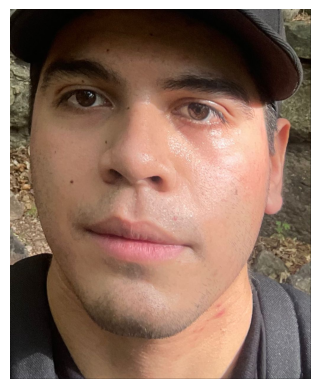

{'famosos': 0, 'propios': 1}
Predicción: Propio


In [ ]:
# Predecir una nueva imagen
def predict_image(image_path):
    test_image = image.load_img(image_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = test_image / 255.0  # Asegurarse de que la imagen esté normalizada
    result = classifier.predict(test_image)
    return result

# Ruta de la imagen que deseas predecir
image_path = r"/content/drive/MyDrive/dataset/test_set/propios/WhatsApp Image 2024-05-29 at 11.29.07 PM (1).jpeg"  # Usa una cadena en bruto

prediction = predict_image(image_path)

# Mostrar la imagen
img = image.load_img(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

print(training_set.class_indices)

# Decodificar la predicción
if prediction[0][0] > 0.5:
    print('Predicción: Famoso')
else:
    print('Predicción: Propio')